In [2]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
spam_data = pd.read_csv('spam.csv', header=None)
spam_data.columns = spam_data.iloc[0]
spam_data = spam_data.drop(0)
spam_data = spam_data.apply(pd.to_numeric, errors='ignore')
spam_data.columns = spam_data.columns.astype(str)

In [4]:
features = spam_data.drop(columns=['Class'])
target = spam_data['Class']

In [5]:
y = target.astype('category').cat.codes

In [6]:
max_features_options = ['sqrt', 'log2', None]

In [7]:
def train_decision_tree(X, y, num_instances, max_features_options):
    results = {}
    X_train = X.iloc[:num_instances]
    y_train = y.iloc[:num_instances]
    X_test = X.iloc[num_instances:]
    y_test = y.iloc[num_instances:]

    for max_feat in max_features_options:
        feature_label = 'All features' if max_feat is None else max_feat
        dt_classifier = DecisionTreeClassifier(max_features=max_feat, random_state=42)
        dt_classifier.fit(X_train, y_train)
        y_pred = dt_classifier.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        cm = confusion_matrix(y_test, y_pred)
        report = classification_report(y_test, y_pred, output_dict=True)
        results[feature_label] = (accuracy, cm, report)
    
    return results

In [8]:
training_sizes = [50, 500, 1000]
all_results = {}

In [9]:
for size in training_sizes:
    all_results[size] = train_decision_tree(features, y, size, max_features_options)

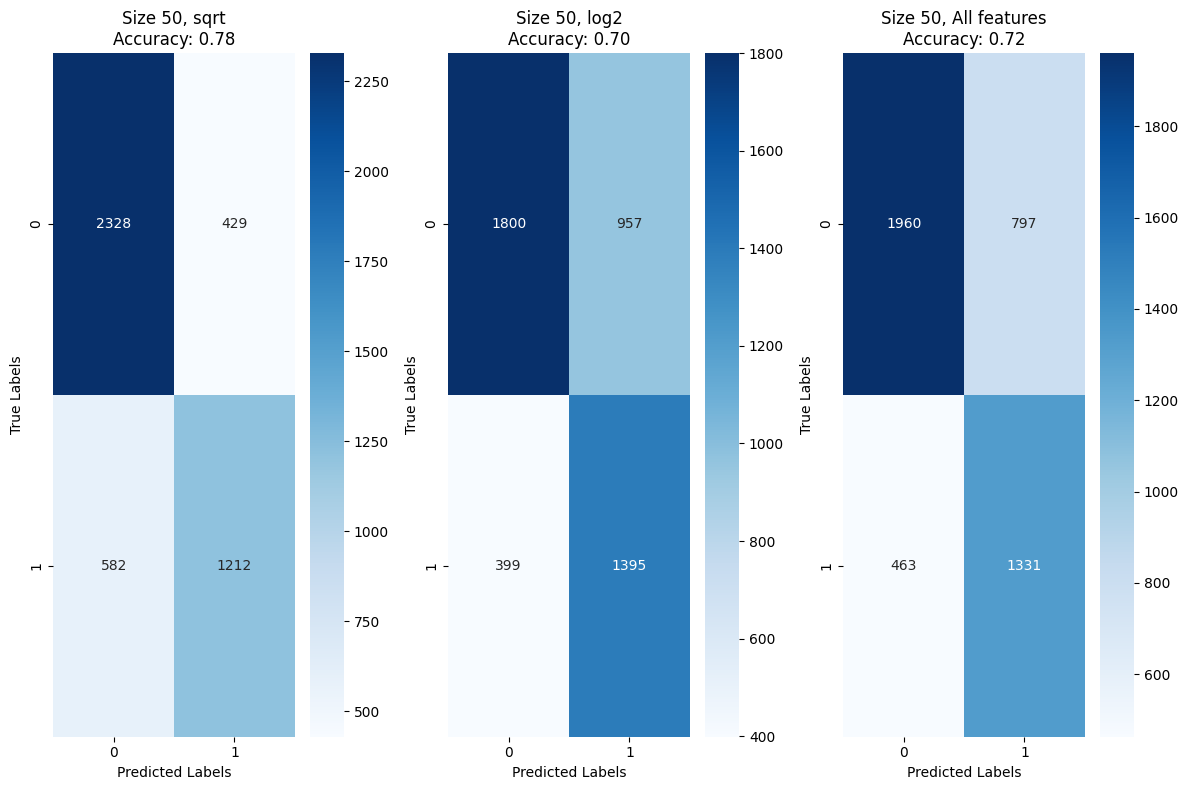

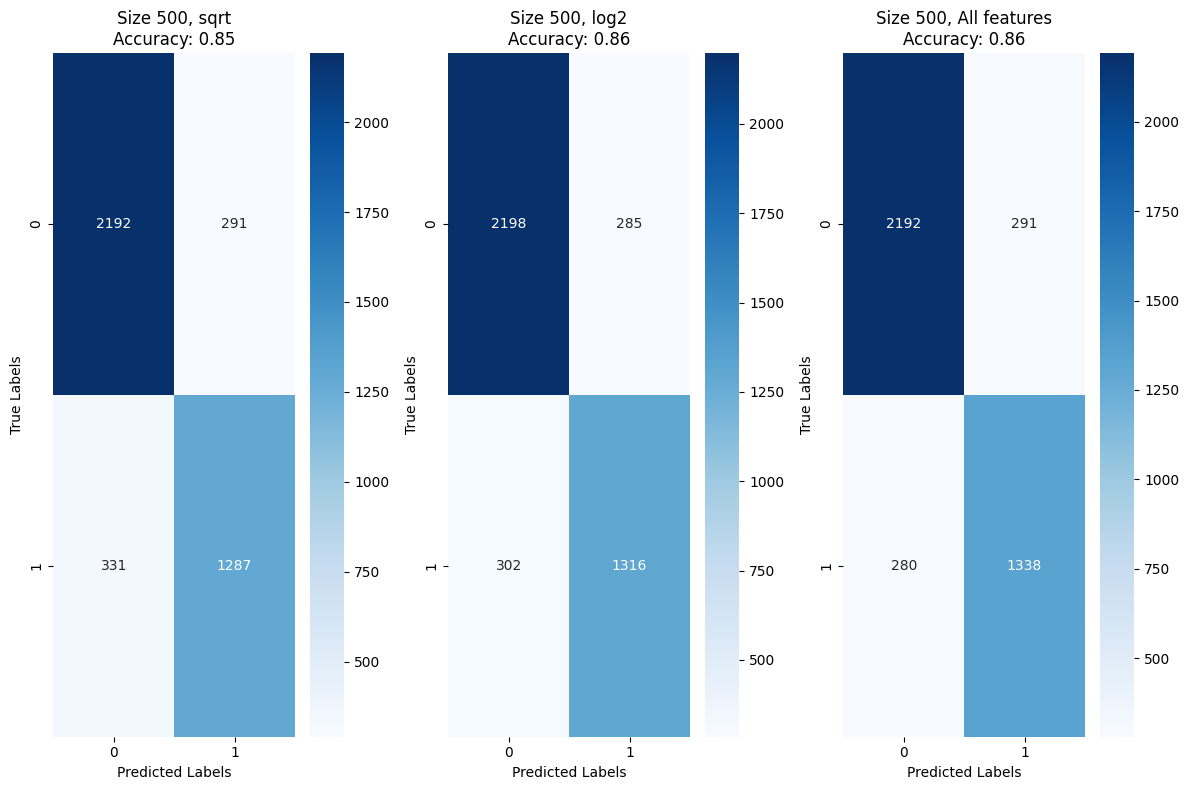

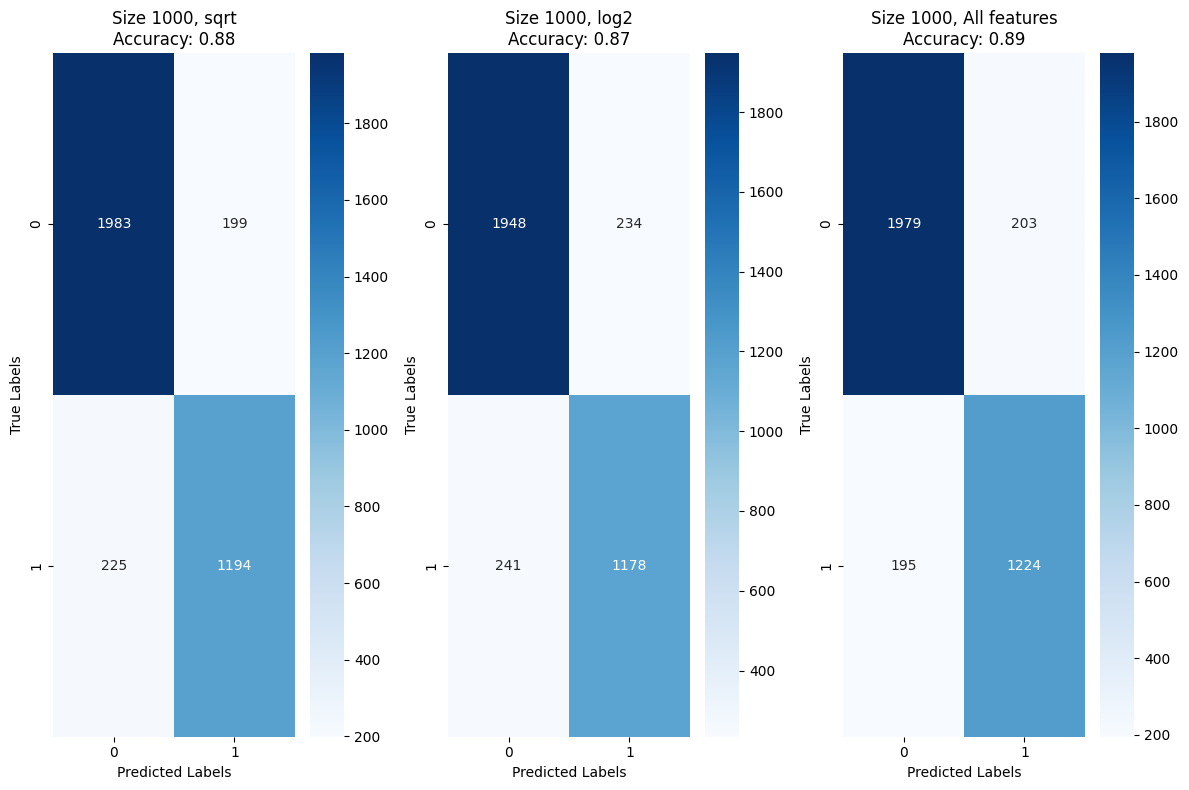

In [10]:
for size, results in all_results.items():
    plt.figure(figsize=(12, 8))
    for idx, (feature, (accuracy, cm, report)) in enumerate(results.items(), 1):
        plt.subplot(1, 3, idx)
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
        plt.title(f'Size {size}, {feature}\nAccuracy: {accuracy:.2f}')
        plt.xlabel('Predicted Labels')
        plt.ylabel('True Labels')

    plt.tight_layout()
    plt.show()

In [11]:
for feature, (accuracy, cm, report) in results.items():
        print(f"Training size: {size}, Max features: {feature}")
        print("Overall Accuracy:", accuracy)
        print("Confusion Matrix:\n", cm)
        print("Classification Report:\n", report)
        print("Per Class Accuracy:", {k: v['precision'] for k, v in report.items() if k.isdigit()})

Training size: 1000, Max features: sqrt
Overall Accuracy: 0.8822549291863371
Confusion Matrix:
 [[1983  199]
 [ 225 1194]]
Classification Report:
 {'0': {'precision': 0.8980978260869565, 'recall': 0.9087992667277727, 'f1-score': 0.9034168564920273, 'support': 2182.0}, '1': {'precision': 0.8571428571428571, 'recall': 0.8414376321353065, 'f1-score': 0.8492176386913229, 'support': 1419.0}, 'accuracy': 0.8822549291863371, 'macro avg': {'precision': 0.8776203416149069, 'recall': 0.8751184494315396, 'f1-score': 0.8763172475916752, 'support': 3601.0}, 'weighted avg': {'precision': 0.8819592254394484, 'recall': 0.8822549291863371, 'f1-score': 0.8820592641401253, 'support': 3601.0}}
Per Class Accuracy: {'0': 0.8980978260869565, '1': 0.8571428571428571}
Training size: 1000, Max features: log2
Overall Accuracy: 0.8680921966120522
Confusion Matrix:
 [[1948  234]
 [ 241 1178]]
Classification Report:
 {'0': {'precision': 0.8899040657834628, 'recall': 0.8927589367552704, 'f1-score': 0.891329215282544